<a href="https://colab.research.google.com/github/mesaystaye/Misc/blob/main/project3_3113_zelalae2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id="org2f36528"></a>

# Section 1: Technical Details and Performance Metrics


<a id="org295a350"></a>

## Technical Details of the Sentiment Classification Model

Our sentiment classification model utilizes **Logistic Regression** with **Elastic Net regularization** to predict the sentiment of movie reviews. Below are the key components and steps involved in the model&rsquo;s implementation, ensuring reproducibility:


<a id="org0a32089"></a>

### Data Preprocessing:

-   **HTML Removal**:: Employed \`BeautifulSoup\` to strip HTML tags from raw review texts, ensuring only meaningful textual content is processed.

-   **Non-letter Character Removal**:: Utilized regular expressions (\`re\` module) to eliminate all non-alphabetic characters, retaining only letters to reduce noise and focus on relevant textual information.

-   **Lowercasing and Tokenization**:: Converted all text to lowercase and split reviews into individual words (tokens) to maintain consistency and enhance model effectiveness.

-   **Stopword Removal**:: Removed common English stopwords using NLTK&rsquo;s \`stopwords\` corpus. This step eliminates words that do not contribute significantly to sentiment analysis, such as &ldquo;the,&rdquo; &ldquo;is,&rdquo; and &ldquo;and.&rdquo;


<a id="org81dadd2"></a>

### Model Implementation:

-   **Algorithm**:: Implemented Logistic Regression with Elastic Net regularization (\`penalty=&rsquo;elasticnet&rsquo;\`) to balance between L1 and L2 regularization (\`l1<sub>ratio</sub>=0\`). This configuration primarily employs Ridge Regression (L2) to handle multicollinearity and prevent overfitting.

-   **Solver**:: Selected the &rsquo;saga&rsquo; solver, which is efficient for large datasets and supports Elastic Net regularization.

-   **Hyperparameters**::
    -   \`C=5\`:: Inversely proportional to regularization strength.
    -   \`max<sub>iter</sub>=1000\`:: Sets the maximum number of iterations.
    -   \`random<sub>state</sub>=42\`:: Ensures reproducibility.

-   **Training**:: The model was trained on the preprocessed and vectorized training data, learning to associate feature patterns with sentiment labels.


<a id="org7403d69"></a>

### Prediction and Evaluation:

-   **Prediction**:: After training, the model predicts the probability of each review belonging to the positive sentiment class.

-   **Evaluation Metric**:: Utilized the Area Under the Receiver Operating Characteristic Curve (AUC-ROC) to assess the model&rsquo;s performance.


<a id="org10e84d1"></a>

## Performance Metrics

The model was evaluated across five distinct data splits with the following results:

<table border="2" cellspacing="0" cellpadding="6" rules="groups" frame="hsides">


<colgroup>
<col  class="org-right" />

<col  class="org-right" />

<col  class="org-left" />
</colgroup>
<thead>
<tr>
<th scope="col" class="org-right">Split</th>
<th scope="col" class="org-right">AUC Score</th>
<th scope="col" class="org-left">Execution Time</th>
</tr>
</thead>
<tbody>
<tr>
<td class="org-right">1</td>
<td class="org-right">0.987140</td>
<td class="org-left">12.71 seconds</td>
</tr>

<tr>
<td class="org-right">2</td>
<td class="org-right">0.986762</td>
<td class="org-left">12.59 seconds</td>
</tr>

<tr>
<td class="org-right">3</td>
<td class="org-right">0.986423</td>
<td class="org-left">12.72 seconds</td>
</tr>

<tr>
<td class="org-right">4</td>
<td class="org-right">0.986954</td>
<td class="org-left">12.51 seconds</td>
</tr>

<tr>
<td class="org-right">5</td>
<td class="org-right">0.986348</td>
<td class="org-left">12.66 seconds</td>
</tr>
</tbody>
<tbody>
<tr>
<td class="org-right">Average</td>
<td class="org-right">0.986665</td>
<td class="org-left">12.64 seconds</td>
</tr>
</tbody>
</table>

**Average AUC:** 0.986665


<a id="org651136a"></a>

## Computer System Specifications

The model was trained and evaluated on the following hardware setup:

-   **System**:: Darwin (macOS)
-   **Processor**:: ARM-based architecture
-   **Physical Cores**:: 14
-   **Total Memory**:: 36.0 GB


<a id="org7f3fcf8"></a>

# Section 2: Interpretability Approach

To elucidate how our Logistic Regression model arrives at its sentiment predictions, we employed **LIME (Local Interpretable Model-agnostic Explanations)** alongside **Global Interpretability** techniques.


<a id="orgeef9ef7"></a>

## Objective

-   **Local Interpretability**:: While the model achieves high overall performance, it&rsquo;s essential to comprehend the rationale behind individual predictions.

-   **Global Interpretability**:: Understanding the overall influence of features (words/phrases) on the model&rsquo;s predictions to gain insights into its decision-making process.


<a id="org2c84e3c"></a>

## Implementation Steps


<a id="orge01dbb2"></a>

### Local Interpretability with LIME

-   **Selection of Reviews**:: Chose 5 positive and 5 negative reviews from the test set to analyze.

-   **Model-Agnostic Explanation**::
    -   **Perturbation**:: LIME generates perturbed samples by modifying the original text (e.g., removing or altering words).
    -   **Model Predictions**:: The trained Logistic Regression model predicts sentiment probabilities for these perturbed samples.
    -   **Local Model Training**:: LIME fits a simple, interpretable model to approximate the behavior of the complex model in the vicinity of the instance being explained.
    -   **Feature Importance**:: The weights assigned by the local model indicate the importance of each word or phrase in influencing the sentiment prediction.

-   **Visualization and Highlighting**::
    -   **HTML Reports**:: Generated HTML files that visually represent the contribution of each feature (word/phrase) to the prediction.
    -   **Highlighted Reviews**:: Created HTML versions of the original reviews with the top contributing words highlighted to provide a qualitative understanding of the model&rsquo;s decisions.


<a id="org96c853a"></a>

### Global Interpretability

-   **Feature Importance Analysis**:: Examined the Logistic Regression model&rsquo;s coefficients to identify the most influential words and phrases contributing to positive and negative sentiments.

-   **Visualization**:: Generated bar plots showcasing the top 10 positive and top 10 negative coefficients, providing a clear overview of feature significance across the entire model.


<a id="org1b13821"></a>

## Conclusion

Integrating LIME into our sentiment classification pipeline enhances both local and global interpretability. Local explanations provide transparency for individual predictions, fostering trust and facilitating error analysis. Meanwhile, global interpretability offers a comprehensive understanding of feature influences, guiding future model refinements and ensuring alignment with domain knowledge.

This dual approach underscores our commitment to building reliable, transparent, and accountable machine learning systems.



In [ ]:
# To remove punctuation and numbers
import re
import pandas as pd
import numpy as np
import warnings

#Vis
import matplotlib.pyplot as plt
import seaborn as sns

#ML
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import roc_auc_score

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics
import statsmodels.api as sm

# Import BeautifulSoup for Removing HTML Markup
from bs4 import BeautifulSoup
# A stop word list from the Python Natural Language Toolkit (NLTK)
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize



In [ ]:
# Removing HTML Markup: The BeautifulSoup Package
!pip install BeautifulSoup4

In [ ]:

nltk.download('stopwords')  # Download text data sets, including stop words
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk

# Download necessary NLTK data
nltk.download('wordnet')
nltk.download('omw-1.4')  # For WordNet lemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Suppress warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


##Goal
Your goal is to achieve an AUC score of at least 0.986 across all five test data splits.

## Resources:
- Kaggle: https://www.kaggle.com/c/word2vec-nlp-tutorial
- What we have tried 1: https://campuswire.com/c/GB46E5679/feed/785

In [ ]:
DATA_DIR='/content/drive/MyDrive/MastersDegree/CS598 PSL/Assignments/Projects/Project3/Data/F24_Proj3_data'

## Part 1 By Zilal

#Logistic Regression


In [ ]:
# Train the final model
def train_logistic(X, y):
    model = LogisticRegression(
        penalty='elasticnet',
        solver='saga',
        l1_ratio=0.5, #means just Ridge Regression
        C=5
    )

    model.fit(X, y)
    return model

In [ ]:
# Making Prediction
def predict(X):
    #X = test.drop(columns=['id', 'review'])
    # Predict probabilities for the test data
    y_pred_proba = model.predict_proba(X)[:, 1]  # Probabilities for positive sentiment
    return y_pred_proba


In [ ]:
num_splits=5
for i in range(num_splits):
  train = pd.read_csv(f"{DATA_DIR}/split_{i+1}/train.csv")
  test = pd.read_csv(f"{DATA_DIR}/split_{i+1}/test.csv")


  # Separate features and target
  X_train = train.drop(columns=['id', 'sentiment', 'review'])
  y_train = train['sentiment']
  X_test = test.drop(columns=['id', 'review'])


  # Logistic regression without penalty as baseline
  model = train_logistic(X_train, y_train)
  y_pred_proba = predict(X_train)
  auc_baseline = roc_auc_score(y_train, y_pred_proba)
  print(f"Baseline Logistic Regression AUC in split {i+1}: {auc_baseline:.4f}")

  submission = pd.DataFrame({
    'id': test['id'],
    'prob': y_pred_proba
  })

  submission.to_csv(f'{DATA_DIR}/split_{i+1}/mysubmission.csv', index=False)

    # Calculate AUC on the test data
  y_test = pd.read_csv(f'{DATA_DIR}/split_{i+1}/test_y.csv')['sentiment']
  y_pred_proba = predict(X_test)

  test_auc_score = roc_auc_score(y_test, y_pred_proba)
  print(f"Best AUC Score on Test Data: in split {i+1}: {test_auc_score:.4f}")


##**Part 2 By Jianci and Messay**

In [ ]:
num_splits=1
for i in range(num_splits):
  train = pd.read_csv(f"{DATA_DIR}/split_{i+1}/train.csv")
  test = pd.read_csv(f"{DATA_DIR}/split_{i+1}/test.csv")


  # Separate features and target
  X_train = train.drop(columns=['id', 'sentiment', 'review'])
  y_train = train['sentiment']
  X_test = test.drop(columns=['id', 'review'])


  # Logistic regression without penalty as baseline
  model = train_logistic(X_train, y_train)
  y_pred_proba = predict(X_train)
  auc_baseline = roc_auc_score(y_train, y_pred_proba)
  print(f"Baseline Logistic Regression AUC in split {i+1}: {auc_baseline:.4f}")

  submission = pd.DataFrame({
    'id': test['id'],
    'prob': y_pred_proba
  })

  submission.to_csv(f'{DATA_DIR}/split_{i+1}/mysubmission.csv', index=False)

    # Calculate AUC on the test data
  y_test = pd.read_csv(f'{DATA_DIR}/split_{i+1}/test_y.csv')['sentiment']
  y_pred_proba = predict(X_test)

  test_auc_score = roc_auc_score(y_test, y_pred_proba)
  print(f"Best AUC Score on Test Data: in split {i+1}: {test_auc_score:.4f}")


Baseline Logistic Regression AUC in split 1: 0.9906
Best AUC Score on Test Data: in split 1: 0.9871


In [ ]:
coefficients = model.coef_  # For multi-class models, it's one row per class
importance = np.abs(coefficients).mean(axis=0)  # Aggregate importance for multi-class

# Create a DataFrame for features and their importance
feature_importance = pd.DataFrame({
    'Feature':X_train.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

feature_importance['Importance_Percent'] = feature_importance['Importance']/(feature_importance['Importance'].sum())*100

In [ ]:
cor_lst = X_train.corrwith(y_train).sort_values(ascending=False).reset_index()
cor_lst.columns=['Feature', 'Correlation']

In [ ]:
feature_summary = cor_lst.merge(feature_importance, on='Feature', how='left').sort_values(by='Correlation', ascending=False)

In [ ]:
feature_important_list_df = feature_summary[(abs(feature_summary['Correlation']) > 0.3) & (feature_summary['Importance_Percent'] > 0.1)]
feature_important_list = feature_important_list_df['Feature'].tolist()
len(feature_important_list)

54

In [ ]:
#important feature with high correlation with sentiment and prove to be high importance for prediction
feature_important_list_df

In [ ]:
# Define a custom tokenizer with lemmatization
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
def lemmatize_tokenizer(text):
    words = text.split()  # Basic split by space
    return [lemmatizer.lemmatize(word.lower()) for word in words if word.lower() not in stop_words]

In [ ]:
def review_to_words( raw_review ):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and
    # the output is a single string (a preprocessed movie review)
    #
    # 1. Remove HTML
    review_text = BeautifulSoup(raw_review).get_text()
    #
    # 2. Remove non-letters
    letters_only = re.sub("[^a-zA-Z]", " ", review_text)
    #
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()
    #
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))
    #
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]
    #
    # 6. Join the words back into one string separated by space,
    # and return the result.

    return( " ".join( meaningful_words ))

In [ ]:
sample_out_put = pd.DataFrame()
sample_word_freq = pd.DataFrame(columns=["feature", 'count', 'word'])
sample_out_put
for index, feature in enumerate(feature_important_list):
  temp = train.sort_values(by=feature_important_list[index], ascending=False)[['sentiment','review', feature_important_list[index]]].head(5)
  temp_train = train.sort_values(by=feature_important_list[index], ascending=False)[['sentiment','review', feature_important_list[index]]].head(500)
  temp['feature'] = feature_important_list[index]
  temp['score'] = temp[feature_important_list[index]]
  temp_total_sentiment = temp['sentiment'].sum()
  if (temp_total_sentiment == 0) | (temp_total_sentiment == 5):
    sample_out_put = pd.concat([sample_out_put , temp[['sentiment','review','feature','score']]], axis = 0)
    #print(temp)


    # Get the number of reviews based on the dataframe column size
    num_reviews = temp_train["review"].size
    print(f"Cleaning and parsing the training set movie reviews for featuer-{feature}...\n")
    # Initialize an empty list to hold the clean reviews
    clean_train_reviews = []
    for j in range( 0, num_reviews ):
      # If the index is evenly divisible by 1000, print a message
      if( (j+1)%100 == 0 ):
        print("Review %d of %d\n" % ( j+1, num_reviews ))
      clean_train_reviews.append( review_to_words( temp_train["review"].iloc[j] ))

    print("Creating the bag of words...\n")

    # Initialize the "CountVectorizer" object, which is scikit-learn's
    # bag of words tool.
    vectorizer = CountVectorizer(analyzer = "word",
                                tokenizer=lemmatize_tokenizer,
                                preprocessor = None,
                                stop_words = None,
                                max_features = 300,
                                ngram_range=(2,3),            # Use 1- to 4-grams
                                min_df=0.001,                       # Minimum term frequency
                                max_df=0.05,                      # Maximum document frequency
                                token_pattern=r"\b[\w+|3']+\b") # Use word tokenizer: See Ethan's comment below; at least len = 3

    # fit_transform() does two functions: First, it fits the model
    # and learns the vocabulary; second, it transforms our training data
    # into feature vectors. The input to fit_transform should be a list of
    # strings.
    train_data_features = vectorizer.fit_transform(clean_train_reviews)

    # Numpy arrays are easy to work with, so convert the result to an
    # array
    train_data_features = train_data_features.toarray()
    # Take a look at the words in the vocabulary
    vocab = vectorizer.get_feature_names_out()

    # Sum up the counts of each vocabulary word
    dist = np.sum(train_data_features, axis=0)

    # For each, print the vocabulary word and the number of times it
    # appears in the training set
    for tag, count in zip(vocab, dist):
      new_row = pd.DataFrame({'feature': feature, 'count': count, 'word': tag}, index=[0])
      sample_word_freq = pd.concat([sample_word_freq, new_row], ignore_index=True)
      print(feature, count, tag)


In [ ]:
sample_out_put.to_csv(f'{DATA_DIR}/split_{i+1}/sample_out_put.csv', index=False)

In [ ]:
sample_word_freq.to_csv(f'{DATA_DIR}/split_{i+1}/sample_word_freq.csv', index=False)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
selected_feature_important_list = sample_out_put['feature'].unique().tolist()
for index, feature in enumerate(selected_feature_important_list):
  df = sample_word_freq[sample_word_freq['feature']==feature].sort_values(by='count', ascending=False)[['word','count']].head(10)
  print(sample_out_put[sample_out_put['feature']==feature])
  plt.figure(figsize=(10, 6))
  plt.bar(df["word"], df["count"])
  plt.title("Word Frequency Chart")
  plt.xlabel("Word")
  plt.ylabel("Count")
  plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
  plt.show()

# **====================== code archive =========================**

In [ ]:
pip install wordcloud matplotlib pillow

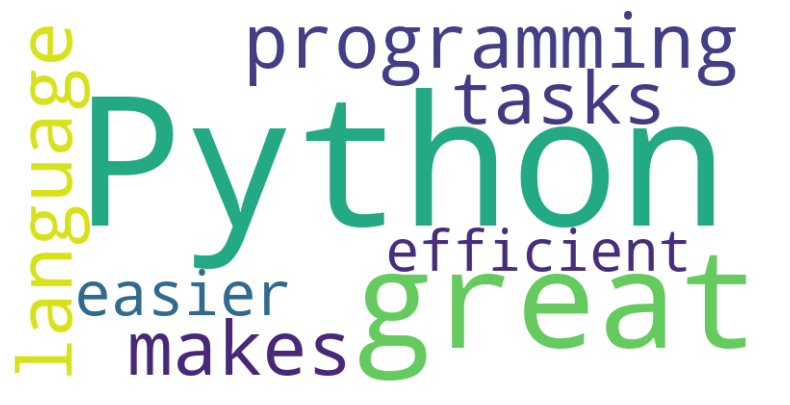

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Sample text
text = "Python is a great programming language. Python makes tasks easier and efficient."

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axes
plt.show()

##Libraries And Packages


In [ ]:
# Removing HTML Markup: The BeautifulSoup Package
!pip install BeautifulSoup4


##Data Cleaning and Text Preprocessing
- Removing HTML Markup: The BeautifulSoup Package
- Frequently occurring words that don't carry much meaning. Such words are called "stop words".

In [ ]:

nltk.download('stopwords')  # Download text data sets, including stop words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def review_to_words( raw_review ):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and
    # the output is a single string (a preprocessed movie review)
    #
    # 1. Remove HTML
    review_text = BeautifulSoup(raw_review).get_text()
    #
    # 2. Remove non-letters
    letters_only = re.sub("[^a-zA-Z]", " ", review_text)
    #
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()
    #
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))
    #
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]
    #
    # 6. Join the words back into one string separated by space,
    # and return the result.

    return( " ".join( meaningful_words ))

# Loop through and clean all of the training set at once

In [ ]:
# Get the number of reviews based on the dataframe column size
num_reviews = train["review"].size
print("Cleaning and parsing the training set movie reviews...\n")
# Initialize an empty list to hold the clean reviews
clean_train_reviews = []
for i in range( 0, num_reviews ):
    # If the index is evenly divisible by 1000, print a message
    if( (i+1)%1000 == 0 ):
        print("Review %d of %d\n" % ( i+1, num_reviews ))
    clean_train_reviews.append( review_to_words( train["review"][i] ))

In [ ]:
print("Creating the bag of words...\n")
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.
vectorizer = CountVectorizer(analyzer = "word",
                             tokenizer = None,
                             preprocessor = None,
                             stop_words = None,
                             max_features = 5000,
                             ngram_range=(1, 4),            # Use 1- to 4-grams
                             min_df=0.001,                       # Minimum term frequency
                             max_df=0.5,                      # Maximum document frequency
                             token_pattern=r"\b[\w+|']+\b") # Use word tokenizer: See Ethan's comment below

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of
# strings.
train_data_features = vectorizer.fit_transform(clean_train_reviews)

# Numpy arrays are easy to work with, so convert the result to an
# array
train_data_features = train_data_features.toarray()

Creating the bag of words...



In [ ]:
# Take a look at the words in the vocabulary
vocab = vectorizer.get_feature_names_out()
print(vocab)

['aaron' 'abandoned' 'abc' ... 'zombie' 'zombies' 'zone']


In [ ]:
# Sum up the counts of each vocabulary word
dist = np.sum(train_data_features, axis=0)

# For each, print the vocabulary word and the number of times it
# appears in the training set
for tag, count in zip(vocab, dist):
    print(count, tag)

In [ ]:
print("Training the random forest...")

# Initialize a Random Forest classifier with 100 trees
forest = RandomForestClassifier(n_estimators = 100)

# Fit the forest to the training set, using the bag of words as
# features and the sentiment labels as the response variable
#
# This may take a few minutes to run
forest = forest.fit( train_data_features, train["sentiment"] )

Training the random forest...


In [ ]:
# Create an empty list and append the clean reviews one by one
num_reviews = len(test["review"])
clean_test_reviews = []

print("Cleaning and parsing the test set movie reviews...\n")
for i in range(0,num_reviews):
    if( (i+1) % 1000 == 0 ):
        print("Review %d of %d\n" % (i+1, num_reviews))
    clean_review = review_to_words( test["review"][i] )
    clean_test_reviews.append( clean_review )

# Get a bag of words for the test set, and convert to a numpy array
test_data_features = vectorizer.transform(clean_test_reviews)
test_data_features = test_data_features.toarray()






In [ ]:
def interpret_model(model, vectorizer, test_reviews, y_test, DATA_DIR):
    """
    Interpret model predictions for 5 positive and 5 negative reviews using LIME.

    Parameters:
    - model: Trained model (LogisticRegression).
    - vectorizer: Fitted CountVectorizer.
    - test_reviews: Original test reviews.
    - y_test: Model's predictions for test data.
    - DATA_DIR: Directory path to save interpretability outputs.
    """
    # Get model predictions to identify positive/negative examples
    test_features = vectorizer.transform([review_to_words(review, set(stopwords.words("english")))
                                        for review in test_reviews]).toarray()
    y_pred = model.predict(test_features)

    # Select 5 positive and 5 negative reviews based on model predictions
    np.random.seed(42)  # For reproducibility
    positive_indices = np.where(y_pred == 1)[0]
    negative_indices = np.where(y_pred == 0)[0]

    num_positive = min(5, len(positive_indices))
    num_negative = min(5, len(negative_indices))

    if num_positive < 5 or num_negative < 5:
        print("Warning: Not enough samples to select 5 positive and 5 negative reviews.")

    selected_positive = np.random.choice(positive_indices, size=num_positive, replace=False)
    selected_negative = np.random.choice(negative_indices, size=num_negative, replace=False)
    selected_indices = np.concatenate([selected_positive, selected_negative])

    selected_reviews = test_reviews.iloc[selected_indices].reset_index(drop=True)
    selected_labels = y_pred[selected_indices]

    # Create directory to save interpretability plots and highlighted reviews
    plots_dir = os.path.join(DATA_DIR, 'interpretability_plots')
    os.makedirs(plots_dir, exist_ok=True)
    highlighted_dir = os.path.join(plots_dir, 'highlighted_reviews')
    os.makedirs(highlighted_dir, exist_ok=True)

    # Global Interpretability for LogisticRegression
    if isinstance(model, LogisticRegression):
        if hasattr(model, 'coef_'):
            coefficients = model.coef_[0]
            feature_names = vectorizer.get_feature_names_out()
            coef_df = pd.DataFrame({
                'feature': feature_names,
                'coefficient': coefficients
            }).sort_values('coefficient', ascending=False)

            top_positive = coef_df.head(10)
            top_negative = coef_df.tail(10)

            plt.figure(figsize=(12, 12))
            plt.subplot(1, 2, 1)
            sns.barplot(data=top_positive, x='coefficient', y='feature', palette='Greens_d')
            plt.title('Top 10 Positive Coefficients')

            plt.subplot(1, 2, 2)
            sns.barplot(data=top_negative, x='coefficient', y='feature', palette='Reds_d')
            plt.title('Top 10 Negative Coefficients')

            plt.tight_layout()
            plt.savefig(os.path.join(plots_dir, 'coefficients.png'))
            plt.close()


=============================================== CODE ARCHIVE ===================================

In [ ]:
l1_ratio_space = np.linspace(0, 1, 10)
for l1_ratio in l1_ratio_space:
    model = LogisticRegression(
        penalty='elasticnet',
        solver='saga',
        l1_ratio=l1_ratio,
        C=5
    )
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_train)[:, 1]
    auc_score = roc_auc_score(y_train, y_pred_proba)
    print(f"l1_ratio = {l1_ratio} Baseline Logistic Regression AUC in split {i+1}: {auc_baseline:.3f}")